In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [13]:
# load data
data = loadmat('//home//khalid//pythonfiles//UN//clustData.mat')
#print(data)
#print(data['X'])
print(data['X'].shape)

(300, 2)


In [22]:
# functions

# select random points
def init_centroids(X, k):
    m, n, = X.shape # shape=(x, y) so m=x, n=y
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:]  = X[idx[i],:]
    
    return centroids

# centroid function
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            #classify points by marked them as 0, 1, or 2
            #it depends on which centerpoint they are close
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

# centroid maker
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n)) # (3,2)
    
    for i in range(k): # 0 1 2
        indices = np.where(idx == i) # indices is a list where i = 0, 1, or 2
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids


# k means function
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids


In [23]:
# classify points
X = data['X']
#manual picking points for K-means
# initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
# initial_centroids = np.array([[8, 0], [8, 6], [0, 3]])
#let program choose points for k-means
initial_centroids = init_centroids(X, 3)
# print(initial_centroids )

In [24]:
#selection step is k-means
idx = find_closest_centroids(X, initial_centroids)
# print(idx)

In [25]:
# calculate new centroid
c = compute_centroids(X, idx, 3)
# print(c)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[0.41852373 4.88312522]
 [1.20099981 4.57829763]
 [0.94048944 5.71556802]]
[1. 1. 1.

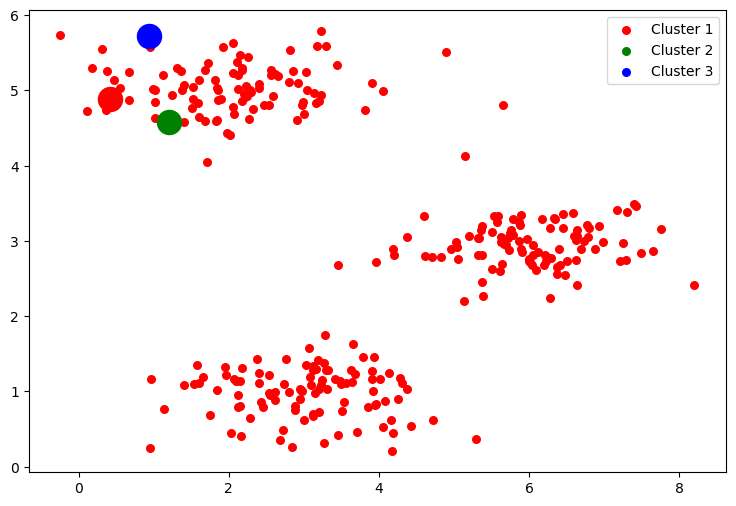

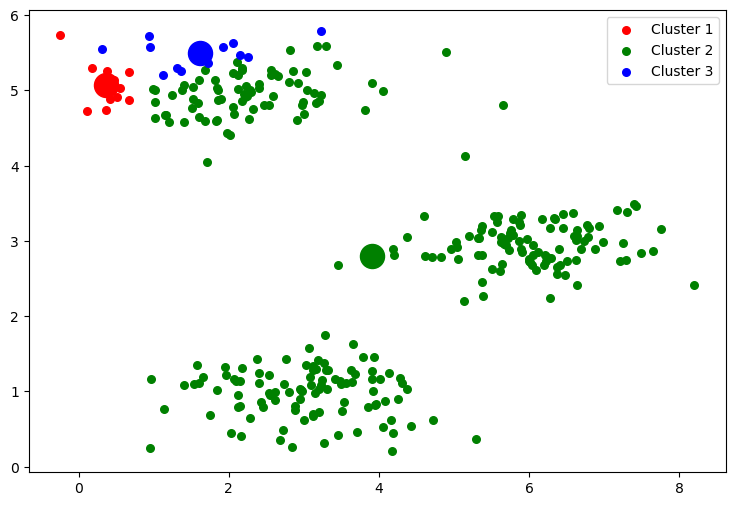

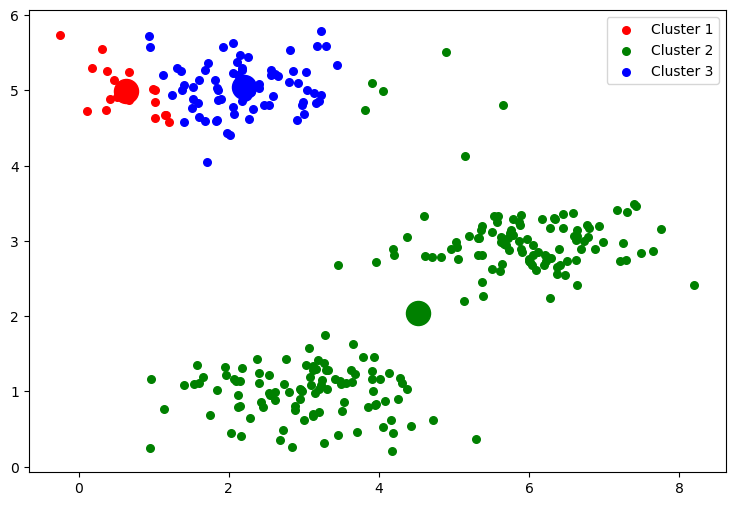

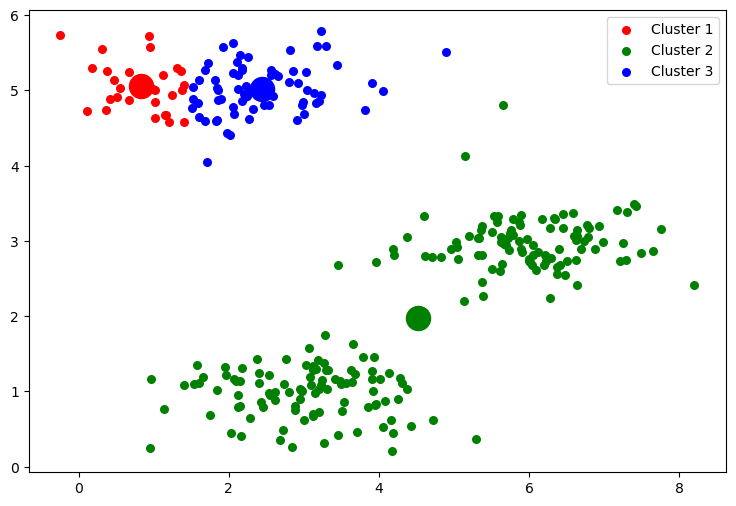

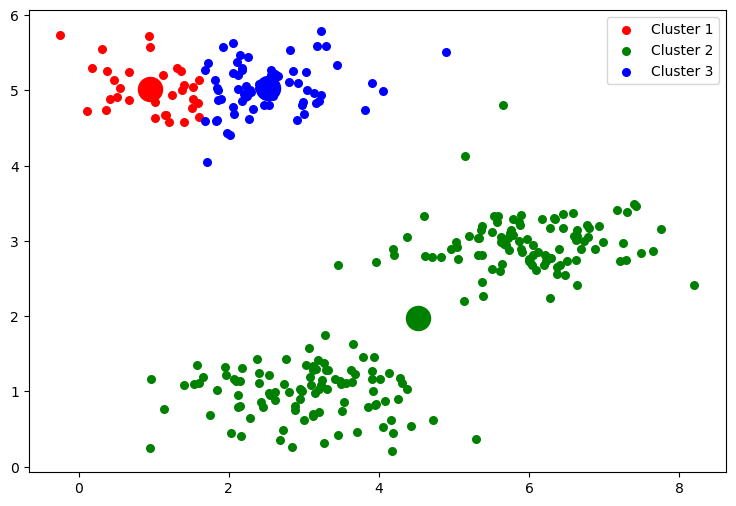

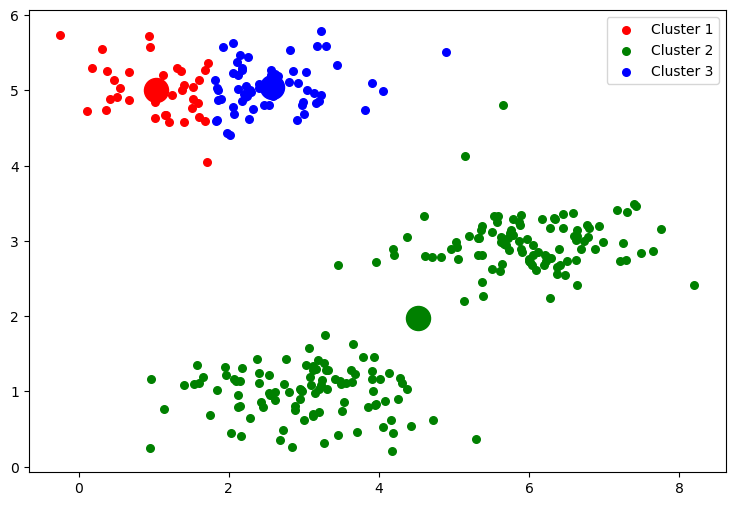

In [27]:
for x in range(6):
    # apply k means
    idx, centroids = run_k_means(X, initial_centroids, x)
    print(idx)
    print()
    print(centroids )
    
    # draw it
    cluster1 = X[np.where(idx == 0)[0],:]
    cluster2 = X[np.where(idx == 1)[0],:]
    cluster3 = X[np.where(idx == 2)[0],:]
    
    fig, ax = plt.subplots(figsize=(9,6))
    ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1') # points
    ax.scatter(centroids[0,0],centroids[0,1],s=300, color='r') # center
    
    ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2') # points
    ax.scatter(centroids[1,0],centroids[1,1],s=300, color='g') # center
    
    ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3') # points
    ax.scatter(centroids[2,0],centroids[2,1],s=300, color='b') # center
    
    ax.legend()
